<a href="https://www.kaggle.com/code/nigamshitij/ml-recap-pca-eigenfaces?scriptVersionId=180422585" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# structure for facial recognition

# find labeled faces

# import set of pictures
# split into training/test

# compute pca / eigenfaces when applied to facial recognition
# create randomized pca
# face

# take pca components and reshape them to make them look like pictures
# transform commands to change them to smaller version

In [4]:
print(__doc__)

from time import time
import logging
import pylab as pl

Automatically created module for IPython interactive environment


In [10]:
# relevant imports from sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC

In [11]:
# progress bar
logging.basicConfig(
    level = logging.INFO,
    format = '%(asctime)s %(message)s'
    )

In [12]:
# get data
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html
image_data = fetch_lfw_people(min_faces_per_person = 50, resize = 0.4)
num_samples, height, width = image_data.images.shape
print("LFW shape: ", image_data.images.shape)

# assign X and # of features
X = image_data.data # Each row corresponds to a ravelled face image of original size 62 x 47 pixels
num_features = X.shape[1]
print("X.shape[1]: ", X.shape[1])

# assign y as target IDs
y = image_data.target # Labels associated to each face image. Those labels range from 0-5748 and correspond to the person IDs.

# capture target names
target_names = image_data.target_names # Names of all persons in the dataset. Position in array corresponds to the person ID in the target array.
num_classes = target_names.shape
print("target_names.shape: ", target_names.shape)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("num_samples: ", num_samples)
print("num_features: ", num_features)
print("num_classes: ", num_classes)

LFW shape:  (1560, 50, 37)
X.shape[1]:  1850
target_names.shape:  (12,)
num_samples:  1560
num_features:  1850
num_classes:  (12,)


In [16]:
# compute pca

# fix components
num_components = 300
print("Num faces: ", X_train.shape[0])
print("Num features: ", X_train.shape[1])

t0 = time()
pca = RandomizedPCA(
    n_components = num_components,
    whiten = True,
    svd_solver = 'randomized'
)
pca.fit(X_train)
print("Time taken: %0.3fs" % (time()-t0))

Num faces:  1248
Num features:  1850
Time taken: 0.776s


In [17]:
# project data

eigenfaces = pca.components_.reshape((num_components, height, width))

t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("Time taken: %0.3fs" % (time()-t0))

Time taken: 0.024s


In [19]:
# run svm classifier

# Dictionary with parameters names (str) as keys and lists of parameter settings to try as values,
# or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored.
# This enables searching over any sequence of parameter settings.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

parameter_grid = {
    'C': [1e3, 5e3, 1e4, 5e4, 1e5],
    'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]
}

clf = GridSearchCV(
    SVC(
        kernel = 'rbf',
        class_weight = 'balanced'
       ),
    parameter_grid
)
clf.fit(X_train_pca, y_train)

print("Best estimator: ", clf.best_estimator_)

Best estimator:  SVC(C=1000.0, class_weight='balanced', gamma=0.001)


In [20]:
# test
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names = target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.80      0.75      0.77        16
     Colin Powell       0.79      0.80      0.80        51
  Donald Rumsfeld       0.68      0.68      0.68        25
    George W Bush       0.77      0.86      0.82       110
Gerhard Schroeder       0.76      0.84      0.80        19
      Hugo Chavez       1.00      0.60      0.75        10
   Jacques Chirac       0.73      0.67      0.70        12
    Jean Chretien       1.00      0.64      0.78        11
    John Ashcroft       0.75      0.38      0.50         8
Junichiro Koizumi       1.00      0.88      0.93        16
  Serena Williams       0.56      0.71      0.63         7
       Tony Blair       0.88      0.81      0.85        27

         accuracy                           0.79       312
        macro avg       0.81      0.72      0.75       312
     weighted avg       0.80      0.79      0.79       312



In [23]:
# confusion matrix
num_classes = target_names.shape[0]
print(confusion_matrix(y_test, y_pred, labels = range(num_classes)))

[[12  1  1  1  0  0  0  0  0  0  0  1]
 [ 1 41  1  6  0  0  0  0  1  0  1  0]
 [ 1  2 17  5  0  0  0  0  0  0  0  0]
 [ 0  8  2 95  1  0  2  0  0  0  1  1]
 [ 0  0  0  3 16  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  6  1  0  0  0  2  0]
 [ 0  0  0  2  2  0  8  0  0  0  0  0]
 [ 0  0  3  1  0  0  0  7  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  3  0  0  1]
 [ 0  0  0  2  0  0  0  0  0 14  0  0]
 [ 0  0  1  1  0  0  0  0  0  0  5  0]
 [ 1  0  0  3  1  0  0  0  0  0  0 22]]


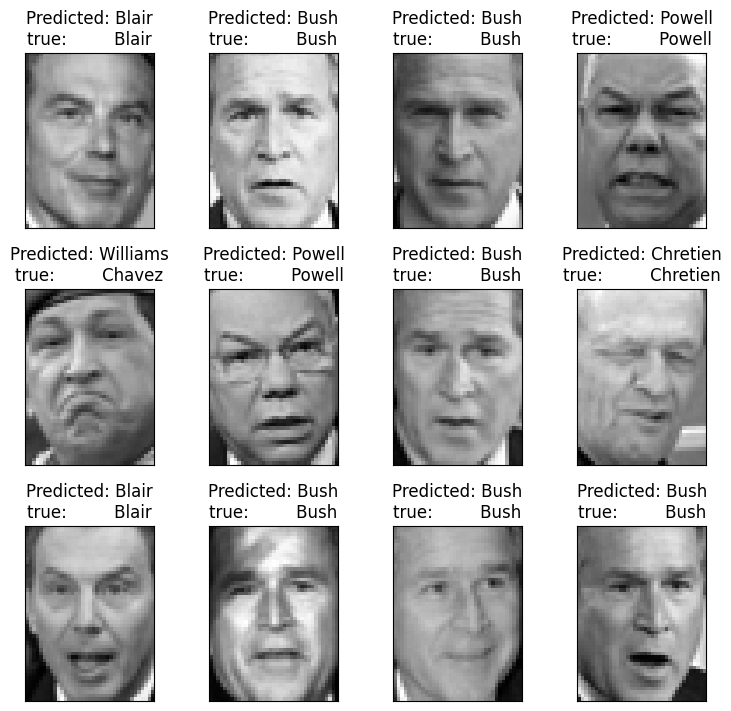

In [25]:
# plot significant eigenfaces

def gallery(images, titles, height, width, num_rows = 3, num_cols = 4):
    pl.figure(figsize = (1.8*num_cols, 2.4*num_rows))
    pl.subplots_adjust(bottom = 0, left = 0.01, right = 0.99, top = 0.9, hspace = 0.35)
    for i in range(num_rows * num_cols):
        pl.subplot(num_rows, num_cols, i+1)
        pl.imshow(images[i].reshape((height, width)), cmap = pl.cm.gray)
        pl.title(titles[i], size = 12)
        pl.xticks(())
        pl.yticks(())

def title_function(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return ('Predicted: %s\ntrue:         %s' % (pred_name, true_name))

prediction_titles = [title_function(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])]

gallery(X_test, prediction_titles, height, width)

pl.show()

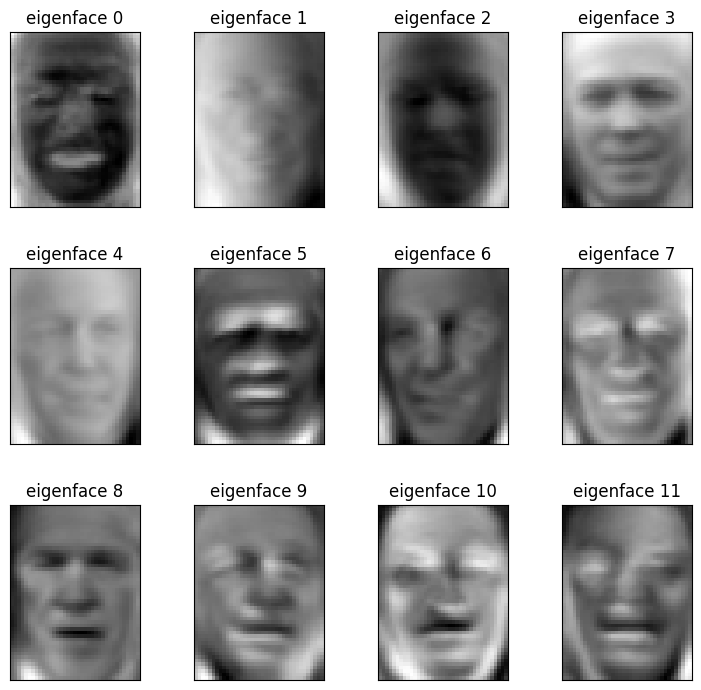

In [26]:
# print eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
gallery(eigenfaces, eigenface_titles, height, width)
pl.show()

In [ ]:
# BOO! ghost faces are cool.